In [17]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud

from src.data_preprocessing.text_preprocessing import normalize_sentences, extract_phrases

In [2]:
wine_dir = "../data/wine"
all_wines = glob.glob(os.path.join(wine_dir, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_wines), ignore_index=True)

In [3]:
df.columns

Index(['Unnamed: 0', 'Alcohol', 'Appellation', 'Bottle Size', 'Category',
       'Country', 'Date Published', 'Description', 'Designation', 'Importer',
       'Name', 'Price', 'Province', 'Rating', 'Region', 'Reviewer',
       'Reviewer Twitter Handle', 'Subregion', 'User Avg Rating', 'Variety',
       'Vintage', 'Winery'],
      dtype='object')

In [4]:
df = df[["Category", "Country", "Description", "Name", "Province", "Region", "Subregion", "Variety"]]
df.head()

,Category,Country,Description,Name,Province,Region,Subregion,Variety
0,Red,US,This red is brightly layered in fresh blue fru...,Westwood 2016 Legend Red (Sonoma Valley),California,Sonoma,Sonoma Valley,"Red Blends, Red Blends"
1,Red,US,"Fantastic purple-leaning aromas of acia, elder...",Refugio Ranch 2016 Barbareño Syrah-Petite Sira...,California,Central Coast,Santa Ynez Valley,"Syrah-Petite Sirah, Red Blends"
2,Red,France,"From selected parcels and aged in wood, this w...",Les Vignobles Gueissard 2016 Cuvée Marcel Red ...,Provence,Bandol,NaN,"Provence red blend, Red Blends"
3,Red,Chile,Ventisquero may make more expensive wines but ...,Ventisquero 2014 Vertice Apalta Vineyard Carme...,Colchagua Valley,NaN,NaN,"Carmenère-Syrah, Red Blends"
4,Red,France,"This wine is produced from organic grapes, woo...",Domaine de la Bégude 2016 La Brulade Red (Bandol),Provence,Bandol,NaN,"Provence red blend, Red Blends"


### General EDA

In [32]:
df.describe()

,Category,Country,Description,Name,Province,Region,Subregion,Variety
count,145396,145203,144780,145396,145197,120963,53090,145202
unique,7,47,144206,143753,488,1060,226,366
top,Red,US,Review unavailable at this time,Ruinart NV Blanc de Blancs Brut Chardonnay (Ch...,California,Columbia Valley,Columbia Valley (WA),Pinot Noir
freq,95861,54495,70,8,27089,13085,6973,17748


We may notice that there are some review missing (`Review unavailable at this time`), such rows provide no useful information.

Also a lot of values are missing for `Subregion` and `Region`, it may be useful to merge all localization features into one. We will also drop rows with NaN in name or description.

In [38]:
df = df[df.Description != "Review unavailable at this time"]
df = df.dropna(subset=["Name", "Description"], how="any")
df = df.drop_duplicates()

In [39]:
df.describe()

,Category,Country,Description,Name,Province,Region,Subregion,Variety
count,144261,144070,144262,144262,144064,120191,52817,144069
unique,7,47,144204,143070,488,1055,226,366
top,Red,US,"Stalky aromas suggest hay and green herbs, wit...",Ruinart NV Blanc de Blancs Brut Chardonnay (Ch...,California,Columbia Valley,Columbia Valley (WA),Pinot Noir
freq,95262,54213,2,7,26989,13051,6956,17535


### Reviews

In [5]:
reviews = list(df["Description"])

Process reviews (tokenize + normalize)

In [9]:
full_corpus = " ".join([str(r) for r in reviews])
tokenized = sent_tokenize(full_corpus)
tokenized[0]

['This red is brightly layered in fresh blue fruit, meat and garrigue, showing plenty of density and complexity.',
 "It has a wild character that's intriguing and energetic, with lasting threads of white and black pepper on the finish."]

In [ ]:
reviews_normalized = normalize_sentences(tokenized)
reviews_normalized[0]

Extract n-grams

In [16]:
reviews_phrases = extract_phrases(reviews_normalized, save_path="../data/wine_trigrams.pkl")
reviews_phrases[0]

['red',
 'bright',
 'layer',
 'fresh',
 'blue',
 'fruit',
 'meat',
 'garrigu',
 'show',
 'plenti',
 'densiti',
 'complex']

Stats (wordmap)

In [25]:
words_all = [word for sublist in reviews_normalized for word in sublist]
words_all_text = " ".join(words_all)

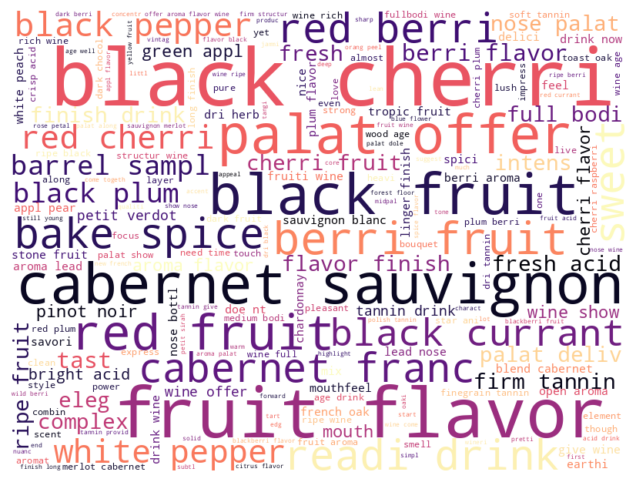

In [28]:
wc = WordCloud(
    width=800, height=600, max_words=200, background_color="white", colormap="magma"
).generate(words_all_text)
plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()